# Recurrent Neural Network(RNN)

## Sequence Models
- Sequence models plays an over time.
- speech recognition, natural language process (NLP), music generation
- Apples Siri and Google's voice search
- Sentiment classification (duygu sınıflandırma) Mesela "bu ders bu dunyadaki en guzel ders" yada "sacma sapan ders cekmissin hocaaa"

# Recurrent Neural Network
   - Kendi hafızaları vardır bu sayede aldıkları bilgileri gizli katmanlarda bulunan nodes ler uzerinde saklar sonra bunların yeni gelen verilerle ilişkisini kontrol eder .
   - İşte zaman serileri , konuşma ,metin ,finansal veriler video gibi verileri işleyebilmemizin sebebi budur  . 
   - Sadece çıktıları beslemekle kalmaz, aynı zamanda geri besleme de verir. Çünkü RNN'in dahili belleği vardır
   - Belleğe sahipler short term memory bir önceki node da olanları hatırlarlar. Eskiyi hatırlar.
   - Mesela geçmişi hatırlamak neden önemli biz yaptıklarımızdan bir şeyler öğreniriz ve yeni öğrenilen şeyleri de eski öğrendiklerimizi üzerine kurarız. RNN'i de aynı mantıkta düşünebilirsiniz.
   - RNN short term memory'e sahip ama LSTM long term memory'e de sahip olabiliyor.
    

# Veri Setinin Yüklenmesi

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings 

warnings.filterwarnings('ignore')

In [2]:
dataset_train = pd.read_csv("Stock_Price_Train.csv")
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


# Veri Düzenlemeleri

In [3]:
# biz bundan sonraki işlemlerimizi open değişkeni üzerinden yürüteceğiz
train = dataset_train.loc[: ,["Open"]].values
train

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [5]:
# verilerimizi ölçekliyelim performans için 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler( feature_range = (0,1) )
train_scaled = scaler.fit_transform(train)
train_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

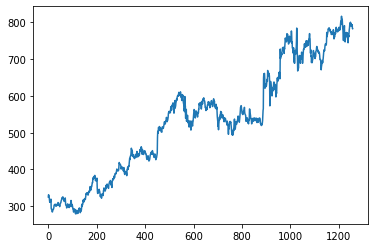

In [6]:
plt.plot(train);


- Şimdi elimizdeki veriyi 50 tanesi tahminci 1 tanesi tahmin edilen değer olarak ayırıyoruz 

In [14]:
X_train = []
y_train = []
timesteps = 50
for i in range(timesteps , 1258):
    X_train.append(train_scaled[i-timesteps:i ,0])
    y_train.append(train_scaled[i , 0])
X_trian , y_train = np.array(X_train) , np.array(y_train)

In [16]:
# yeniden sekillendirelim (reshaping)
X_train = np.reshape(X_trian, (X_trian.shape[0], X_trian.shape[1], 1))
X_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.03675869],
        [0.04486941],
        [0.05065481]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.04486941],
        [0.05065481],
        [0.05214302]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.05065481],
        [0.05214302],
        [0.05612397]],

       ...,

       [[0.9313937 ],
        [0.94636878],
        [0.96569685],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.94636878],
        [0.96569685],
        [0.97510976],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.96569685],
        [0.97510976],
        [0.95966962],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

In [17]:
y_train

array([0.05214302, 0.05612397, 0.05818885, ..., 0.95725128, 0.93796041,
       0.93688146])

# RNN modelinin Kurulması

In [23]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

# Adding the first RNN Layer and some Dropout Regularisation
regressor.add(SimpleRNN( units = 50 ,activation = "tanh" ,return_sequences = True  , input_shape = (X_train.shape[1] ,1)))
regressor.add(Dropout(0.2))

regressor.add(SimpleRNN( units = 50 ,activation = "tanh" ,return_sequences = True ))
regressor.add(Dropout(0.2))

regressor.add(SimpleRNN( units = 50 ,activation = "tanh" ,return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(SimpleRNN( units = 50 ))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))


regressor.compile(optimizer = "adam"  ,loss="mean_squared_error")

regressor.fit(X_train ,y_train ,epochs = 100 , batch_size = 32)


Epoch 1/100
1208/1208 [==============================] - 2s 1ms/step - loss: 0.4660
Epoch 2/100
1208/1208 [==============================] - 1s 954us/step - loss: 0.3046
Epoch 3/100
1208/1208 [==============================] - 1s 975us/step - loss: 0.2239
Epoch 4/100
1208/1208 [==============================] - 1s 945us/step - loss: 0.1722
Epoch 5/100
1208/1208 [==============================] - 1s 941us/step - loss: 0.1270
Epoch 6/100
1208/1208 [==============================] - 1s 954us/step - loss: 0.1070
Epoch 7/100
1208/1208 [==============================] - 1s 959us/step - loss: 0.0910
Epoch 8/100
1208/1208 [==============================] - 1s 946us/step - loss: 0.0723
Epoch 9/100
1208/1208 [==============================] - 1s 967us/step - loss: 0.0668
Epoch 10/100
1208/1208 [==============================] - 1s 970us/step - loss: 0.0542
Epoch 11/100
1208/1208 [==============================] - 1s 970us/step - loss: 0.0470
Epoch 12/100
1208/1208 [=============================

# Tahmin etme Ve Görselleştirme

In [24]:
dataset_test = pd.read_csv("Stock_Price_Test.csv")
dataset_test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [26]:
real_stock_price = dataset_test.loc[: ,["Open"]].values
real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [28]:
dataset_total = pd.concat((dataset_train["Open"] ,dataset_test["Open"]) ,axis=0)
inputs = dataset_total[len(dataset_total) -len(dataset_test) - timesteps:].values.reshape(-1 ,1)
inputs = scaler.transform(inputs)
inputs

array([[0.97510976],
       [0.95966962],
       [0.97808617],
       [1.        ],
       [0.98076494],
       [0.97083116],
       [0.98450406],
       [0.96054394],
       [0.9371419 ],
       [0.92841729],
       [0.90804747],
       [0.8771858 ],
       [0.92153434],
       [0.93809063],
       [0.93165414],
       [0.95254483],
       [0.88812412],
       [0.88637547],
       [0.87032145],
       [0.88563137],
       [0.90743359],
       [0.91571173],
       [0.89941588],
       [0.91805566],
       [0.9089404 ],
       [0.9024853 ],
       [0.89456061],
       [0.91600938],
       [0.9132934 ],
       [0.88979835],
       [0.86589404],
       [0.89030062],
       [0.90335962],
       [0.89642086],
       [0.91777662],
       [0.93176576],
       [0.94114145],
       [0.95762334],
       [0.96413424],
       [0.96402262],
       [0.96971501],
       [0.95077759],
       [0.96294367],
       [0.96123223],
       [0.95475854],
       [0.95204256],
       [0.95163331],
       [0.957

In [29]:
X_test = []
for i in range(timesteps ,70):
    X_test.append(inputs[i - timesteps:i , 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test , (X_test.shape[0] , X_test.shape[1] ,1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price) # scale edilmemiş haline çeviriyoruz 



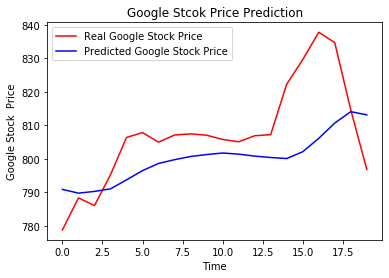

In [30]:
plt.plot( real_stock_price , color = "red"  ,label = "Real Google Stock Price")
plt.plot( predicted_stock_price , color = "blue" , label = "Predicted Google Stock Price")
plt.title( "Google Stcok Price Prediction" )
plt.xlabel("Time")
plt.ylabel("Google Stock  Price")
plt.legend()
plt.show()